In [1]:
import pandas
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
data = pandas.read_csv("mean_data.csv")
cl=data.columns
X=data[cl[1:len(cl)-1]]
y=data['Rings']

In [3]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.7, test_size=0.3, random_state=123) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print('accuracy',accuracy)  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print('confusion matrix')
print(cm)


accuracy 0.7679425837320574
confusion matrix
[[ 73  74   0   0]
 [ 15 890   0   0]
 [  1 173   0   0]
 [  0  28   0   0]]


In [4]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7523029682702149, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7587268993839835, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7582304526748971, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7277379733879222, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.728952772073922, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7304526748971193, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7277379733879222, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.728952772073922, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7304526748971193, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf .......

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.728952772073922, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7304526748971193, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7625383828045036, total=   0.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7618069815195072, total=   0.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.772633744855967, total=   0.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7615148413510747, total=   0.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7700205338809035, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=rbf ....

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   24.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [5]:
from sklearn.metrics import classification_report
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [6]:
grid_predictions = grid.predict(X_test) 
print(' classification report') 
print('-----------------------------')
print(classification_report(y_test, grid_predictions)) 
print(grid.score(X_test,y_test))

 classification report
-----------------------------
              precision    recall  f1-score   support

           1       0.77      0.51      0.61       147
           2       0.78      0.96      0.86       905
           3       0.58      0.14      0.23       174
           4       0.00      0.00      0.00        28

   micro avg       0.77      0.77      0.77      1254
   macro avg       0.53      0.40      0.43      1254
weighted avg       0.74      0.77      0.73      1254

0.773524720893142


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline



Accuracy for kernel = linear , 0.7679425837320574


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for kernel = rbf , 0.7647527910685805


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for kernel = sigmoid , 0.740829346092504


Text(0, 0.5, 'Testing Accuracy')

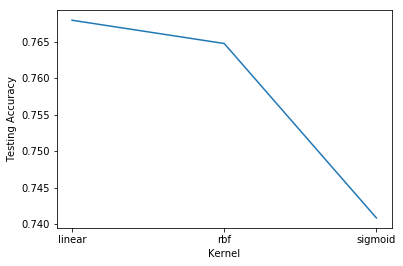

In [8]:
kernels = ['linear', 'rbf', 'sigmoid']
scores=[]
for kernel in kernels:
    model = svm.SVC(kernel=kernel).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    accuracy = model.score(X_test, y_test) 
    print('Accuracy for kernel = ' +str(kernel),',',accuracy) 
    scores.append(accuracy)
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(kernels, scores)
plt.xlabel('Kernel')
plt.ylabel('Testing Accuracy')
  

  


accuracy for gamma = 0.1 , 0.7647527910685805
accuracy for gamma = 1 , 0.7647527910685805
accuracy for gamma = 10 , 0.7719298245614035
accuracy for gamma = 100 , 0.7631578947368421


Text(0, 0.5, 'Testing Accuracy')

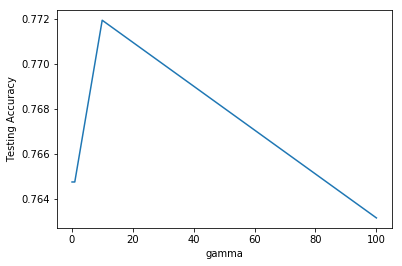

In [9]:
gammas = [0.1, 1, 10, 100]
scores=[]
for gamma in gammas:
    model = svm.SVC(kernel='rbf', gamma=gamma).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    accuracy = model.score(X_test, y_test) 
    print('accuracy for gamma = ' + str(gamma),',',accuracy) 
    scores.append(accuracy)
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(gammas, scores)
plt.xlabel('gamma')
plt.ylabel('Testing Accuracy')
   


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =0.1 , 0.7216905901116427


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =1 , 0.7647527910685805


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =10 , 0.7687400318979266


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =100 , 0.7647527910685805


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =1000 , 0.7679425837320574


Text(0, 0.5, 'Testing Accuracy')

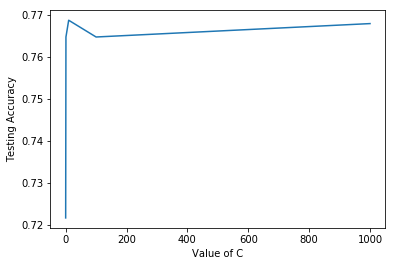

In [10]:
cs = [0.1, 1, 10, 100, 1000]
scores=[]
for c in cs:
    model = svm.SVC(kernel='rbf', C=c).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    accuracy = model.score(X_test, y_test) 
    print('Accuracy for cs ='+str(c),',',accuracy) 
    scores.append(accuracy)
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(cs, scores)
plt.xlabel('Value of C')
plt.ylabel('Testing Accuracy')
   
   

### SVM for median 

accuracy 0.7679425837320574
confusion matrix
[[ 73  74   0   0]
 [ 15 890   0   0]
 [  1 173   0   0]
 [  0  28   0   0]]
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7523029682702149, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7587268993839835, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7582304526748971, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7277379733879222, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.728952772073922, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7304526748971193, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7277379733879222, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.728952772073922, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7304526748971193, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf .......

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.728952772073922, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7304526748971193, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7635619242579325, total=   0.6s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7618069815195072, total=   0.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.772633744855967, total=   0.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7615148413510747, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.768993839835729, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=rbf .....

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   22.4s finished


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
 classification report
-----------------------------
              precision    recall  f1-score   support

           1       0.77      0.51      0.61       147
           2       0.78      0.96      0.86       905
           3       0.58      0.14      0.23       174
           4       0.00      0.00      0.00        28

   micro avg       0.77      0.77      0.77      1254
   macro avg       0.53      0.40      0.43      1254
weighted avg       0.74      0.77      0.73      1254

0.773524720893142
Accuracy for linear , 0.7679425837320574


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for rbf , 0.7647527910685805


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for sigmoid , 0.7416267942583732


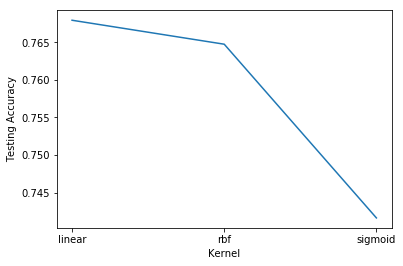

accuracy for gamma = 0.1 , 0.7647527910685805
accuracy for gamma = 1 , 0.7647527910685805
accuracy for gamma = 10 , 0.7719298245614035
accuracy for gamma = 100 , 0.7631578947368421


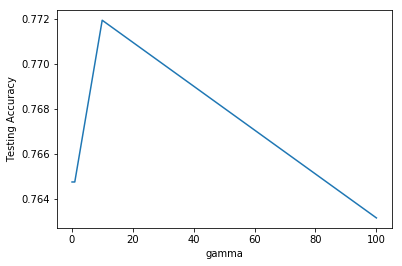

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =0.1 , 0.7216905901116427


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =1 , 0.7647527910685805


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =10 , 0.7687400318979266


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =100 , 0.7647527910685805


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =1000 , 0.7679425837320574


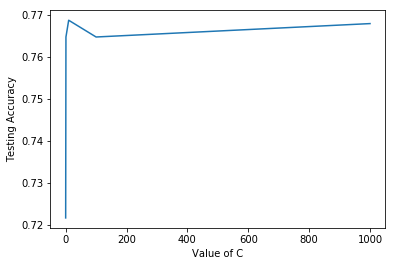

In [11]:
data = pandas.read_csv("median_data.csv")
cl=data.columns
X=data[cl[1:len(cl)-1]]
y=data['Rings']

#...............................................................................
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.7, test_size=0.3, random_state=123) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print('accuracy',accuracy)  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print('confusion matrix')
print(cm)

#..........................................................
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
#............................................................................

print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

#...................................................................

grid_predictions = grid.predict(X_test) 
print(' classification report') 
print('-----------------------------')
print(classification_report(y_test, grid_predictions)) 
print(grid.score(X_test,y_test))

#....................................................

kernels = ['linear', 'rbf', 'sigmoid']
scores=[]
for kernel in kernels:
    model = svm.SVC(kernel=kernel).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    accuracy = model.score(X_test, y_test) 
    print('Accuracy for ' +str(kernel),',',accuracy) 
    scores.append(accuracy)
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.figure(1)
plt.plot(kernels, scores)
plt.xlabel('Kernel')
plt.ylabel('Testing Accuracy')
plt.interactive(True)
plt.show()
#.................................................................
gammas = [0.1, 1, 10, 100]
scores=[]
for gamma in gammas:
    model = svm.SVC(kernel='rbf', gamma=gamma).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    accuracy = model.score(X_test, y_test) 
    print('accuracy for gamma = ' + str(gamma),',',accuracy) 
    scores.append(accuracy)
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.figure(2)
plt.plot(gammas, scores)
plt.xlabel('gamma')
plt.ylabel('Testing Accuracy')
plt.interactive(True)
plt.show()
#............................................................................................
cs = [0.1, 1, 10, 100, 1000]
scores=[]
for c in cs:
    model = svm.SVC(kernel='rbf', C=c).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    accuracy = model.score(X_test, y_test) 
    print('Accuracy for cs ='+str(c),',',accuracy) 
    scores.append(accuracy)
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.figure(3)
plt.plot(cs, scores)
plt.xlabel('Value of C')
plt.ylabel('Testing Accuracy')
plt.show()
   

### SVM for knn imputation


accuracy 0.7719298245614035
confusion matrix
[[ 82  65   0   0]
 [ 22 882   1   0]
 [  1 169   4   0]
 [  0  26   2   0]]
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7604912998976459, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7720739219712526, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7664609053497943, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7277379733879222, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.728952772073922, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7304526748971193, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7277379733879222, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.728952772073922, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7304526748971193, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7277379733879222, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ...

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7304526748971193, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7809621289662231, total=   0.4s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7864476386036962, total=   0.4s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7942386831275721, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7942681678607983, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7987679671457906, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7921810699588477, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ...

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   17.5s finished


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
 classification report
-----------------------------
              precision    recall  f1-score   support

         1.0       0.82      0.54      0.65       147
         2.0       0.82      0.95      0.88       905
         3.0       0.59      0.34      0.44       174
         4.0       0.00      0.00      0.00        28
         5.0       0.00      0.00      0.00         0

   micro avg       0.80      0.80      0.80      1254
   macro avg       0.45      0.37      0.39      1254
weighted avg       0.77      0.80      0.77      1254

0.7982456140350878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Accuracy for linear , 0.7719298245614035


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for rbf , 0.7655502392344498


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for sigmoid , 0.759170653907496


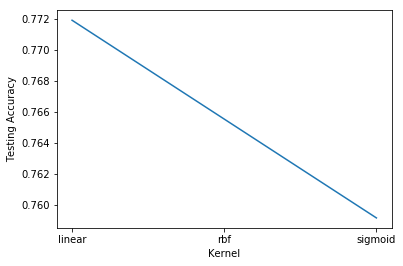

accuracy for gamma = 0.1 , 0.7655502392344498
accuracy for gamma = 1 , 0.7671451355661882
accuracy for gamma = 10 , 0.7862838915470495
accuracy for gamma = 100 , 0.7926634768740032


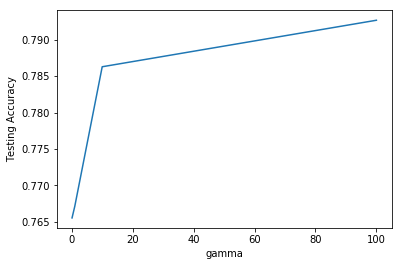

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =0.1 , 0.7216905901116427


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =1 , 0.7655502392344498


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =10 , 0.777511961722488


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =100 , 0.7942583732057417


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for cs =1000 , 0.7982456140350878


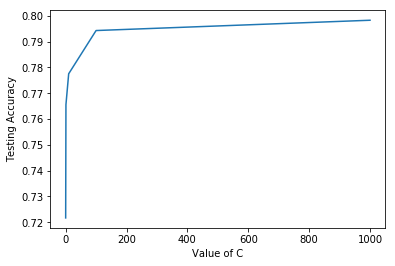

In [12]:
data = pandas.read_csv("knn_data.csv")
cl=data.columns
X=data[cl[1:len(cl)-1]]
y=data['Rings']

#...............................................................................
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.7, test_size=0.3, random_state=123) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print('accuracy',accuracy)  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print('confusion matrix')
print(cm)

#..........................................................
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
#............................................................................

print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

#...................................................................

grid_predictions = grid.predict(X_test) 
print(' classification report') 
print('-----------------------------')
print(classification_report(y_test, grid_predictions)) 
print(grid.score(X_test,y_test))

#....................................................

kernels = ['linear', 'rbf', 'sigmoid']
scores=[]
for kernel in kernels:
    model = svm.SVC(kernel=kernel).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    accuracy = model.score(X_test, y_test) 
    print('Accuracy for ' +str(kernel),',',accuracy) 
    scores.append(accuracy)
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.figure(1)
plt.plot(kernels, scores)
plt.xlabel('Kernel')
plt.ylabel('Testing Accuracy')
plt.interactive(True)
plt.show()
#.................................................................
gammas = [0.1, 1, 10, 100]
scores=[]
for gamma in gammas:
    model = svm.SVC(kernel='rbf', gamma=gamma).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    accuracy = model.score(X_test, y_test) 
    print('accuracy for gamma = ' + str(gamma),',',accuracy) 
    scores.append(accuracy)
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.figure(2)
plt.plot(gammas, scores)
plt.xlabel('gamma')
plt.ylabel('Testing Accuracy')
plt.interactive(True)
plt.show()
#............................................................................................
cs = [0.1, 1, 10, 100, 1000]
scores=[]
for c in cs:
    model = svm.SVC(kernel='rbf', C=c).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    accuracy = model.score(X_test, y_test) 
    print('Accuracy for cs ='+str(c),',',accuracy) 
    scores.append(accuracy)
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.figure(3)
plt.plot(cs, scores)
plt.xlabel('Value of C')
plt.ylabel('Testing Accuracy')
plt.show()
   